EDA - NLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as ss
from sklearn.decomposition import PCA

In [2]:
pd.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv('data_cols_reviews_amazon.csv')

In [4]:
data.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,Cleaned_Review,review_punc_stop_words_removed,review_removed_cnt,porterStemmer,WordNet_Lemmatizer
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"['more', 'like', 'funchuck']","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",3,20,"['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...","['gave', 'dad', 'gag', 'gift', 'directing', 'n...",9,"['gave', 'dad', 'gag', 'gift', 'directing', 'n...","['gave', 'dad', 'gag', 'gift', 'directing', 'n..."
1,5,Positive,inspiring,i hope a lot of people hear this cd we need m...,204,9,['inspiring'],"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",1,38,"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...","['hope', 'lot', 'people', 'hear', 'need', 'str...",22,"['hope', 'lot', 'people', 'hear', 'need', 'str...","['hope', 'lot', 'people', 'hear', 'need', 'str..."
2,5,Positive,the best soundtrack ever to anything,i m reading a lot of reviews saying that this ...,470,37,"['the', 'best', 'soundtrack', 'ever', 'to', 'a...","['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...",6,96,"['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...","['reading', 'lot', 'saying', 'best', 'game', '...",34,"['reading', 'lot', 'saying', 'best', 'game', '...","['reading', 'lot', 'saying', 'best', 'game', '..."
3,4,Not Considered,chrono cross ost,the music of yasunori misuda is without questi...,393,16,"['chrono', 'cross', 'ost']","['the', 'music', 'of', 'yasunori', 'misuda', '...",3,68,"['the', 'music', 'of', 'yasunori', 'misuda', '...","['music', 'yasunori', 'misuda', 'question', 'c...",36,"['music', 'yasunori', 'misuda', 'question', 'c...","['music', 'yasunori', 'misuda', 'question', 'c..."
4,5,Positive,too good to be true,probably the greatest soundtrack in history u...,377,19,"['too', 'good', 'to', 'be', 'true']","['probably', 'the', 'greatest', 'soundtrack', ...",5,67,"['probably', 'the', 'greatest', 'soundtrack', ...","['probably', 'greatest', 'soundtrack', 'histor...",28,"['probably', 'greatest', 'soundtrack', 'histor...","['probably', 'greatest', 'soundtrack', 'histor..."


In [5]:
data.columns

Index(['Rating', 'Rating_Sentiment', 'Review_Title', 'Review',
       'Review_str_len', 'Title_str_len', 'title_word_tokenize',
       'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt',
       'Cleaned_Review', 'review_punc_stop_words_removed',
       'review_removed_cnt', 'porterStemmer', 'WordNet_Lemmatizer'],
      dtype='object')

In [6]:
print(data.dtypes)

Rating                             int64
Rating_Sentiment                  object
Review_Title                      object
Review                            object
Review_str_len                     int64
Title_str_len                      int64
title_word_tokenize               object
Review_word_tokenize              object
title_wtoken_cnt                   int64
Review_wtoken_cnt                  int64
Cleaned_Review                    object
review_punc_stop_words_removed    object
review_removed_cnt                 int64
porterStemmer                     object
WordNet_Lemmatizer                object
dtype: object


In [7]:
data['Review_word_tokenize'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000000 entries, 0 to 2999999
Series name: Review_word_tokenize
Non-Null Count    Dtype 
--------------    ----- 
3000000 non-null  object
dtypes: object(1)
memory usage: 22.9+ MB


In [8]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud

In [10]:
#Creating word Cloud
def showWordCloud(words):
    word_cloud = WordCloud(background_color="white").generate(words)
    plt.imshow(word_cloud)
    plt.show()

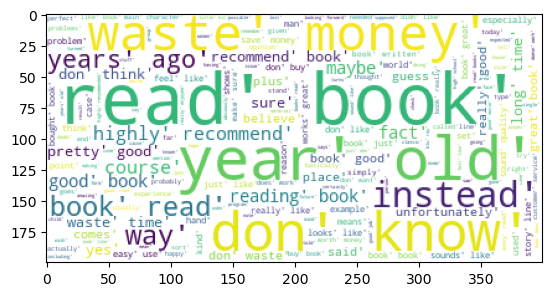

In [11]:
showWordCloud(''.join(data["review_punc_stop_words_removed"].astype(str)))

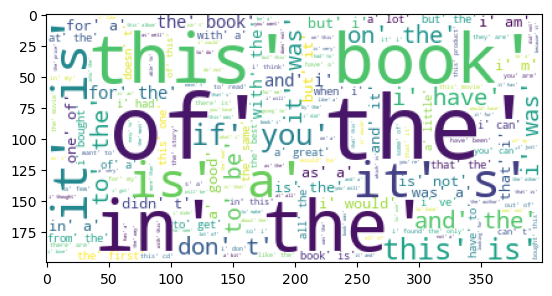

In [12]:
# review Review_word_tokenize
showWordCloud(''.join(data["Review_word_tokenize"].astype(str)))

In [13]:
data.columns

Index(['Rating', 'Rating_Sentiment', 'Review_Title', 'Review',
       'Review_str_len', 'Title_str_len', 'title_word_tokenize',
       'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt',
       'Cleaned_Review', 'review_punc_stop_words_removed',
       'review_removed_cnt', 'porterStemmer', 'WordNet_Lemmatizer'],
      dtype='object')

In [14]:
neutral_rating = data[data["Rating"]==3]

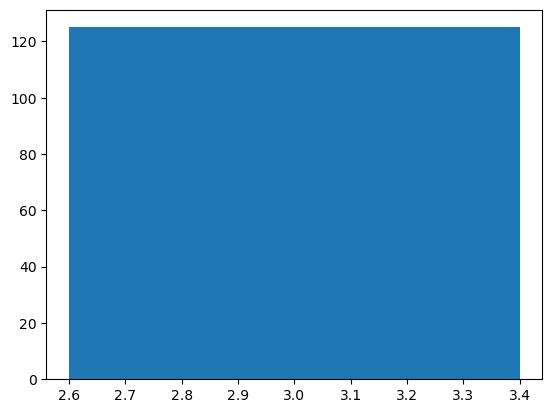

In [15]:
_ = plt.bar(neutral_rating["Rating"], neutral_rating["review_removed_cnt"])
plt.show()

In [16]:
data.groupby('Rating')['Review_wtoken_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,600000.0,76.657483,42.620808,0.0,41.0,68.0,105.0,252.0
2,600000.0,82.806163,43.942050,0.0,46.0,76.0,115.0,241.0
3,600000.0,80.919108,44.736159,0.0,43.0,73.0,114.0,215.0
4,600000.0,77.406273,44.571482,0.0,39.0,69.0,109.0,217.0
5,600000.0,70.183220,42.522291,0.0,35.0,60.0,98.0,436.0


In [17]:
filtered_data = data[data['Review_word_tokenize'] == '$']
print(filtered_data)

Empty DataFrame
Columns: [Rating, Rating_Sentiment, Review_Title, Review, Review_str_len, Title_str_len, title_word_tokenize, Review_word_tokenize, title_wtoken_cnt, Review_wtoken_cnt, Cleaned_Review, review_punc_stop_words_removed, review_removed_cnt, porterStemmer, WordNet_Lemmatizer]
Index: []


In [18]:
print(data['Review_word_tokenize'].unique())

["['gave', 'this', 'to', 'my', 'dad', 'for', 'a', 'gag', 'gift', 'after', 'directing', 'nunsense', 'he', 'got', 'a', 'reall', 'kick', 'out', 'of', 'it']"
 "['i', 'hope', 'a', 'lot', 'of', 'people', 'hear', 'this', 'cd', 'we', 'need', 'more', 'strong', 'and', 'positive', 'vibes', 'like', 'this', 'great', 'vocals', 'fresh', 'tunes', 'cross', 'cultural', 'happiness', 'her', 'blues', 'is', 'from', 'the', 'gut', 'the', 'pop', 'sounds', 'are', 'catchy', 'and', 'mature']"
 "['i', 'm', 'reading', 'a', 'lot', 'of', 'reviews', 'saying', 'that', 'this', 'is', 'the', 'best', 'game', 'soundtrack', 'and', 'i', 'figured', 'that', 'i', 'd', 'write', 'a', 'review', 'to', 'disagree', 'a', 'bit', 'this', 'in', 'my', 'opinino', 'is', 'yasunori', 'mitsuda', 's', 'ultimate', 'masterpiece', 'the', 'music', 'is', 'timeless', 'and', 'i', 'm', 'been', 'listening', 'to', 'it', 'for', 'years', 'now', 'and', 'its', 'beauty', 'simply', 'refuses', 'to', 'fade', 'the', 'price', 'tag', 'on', 'this', 'is', 'pretty', 's

In [19]:
# Making a histogram of the Review Count variable.
#_ = plt.hist(data['review_punc_stop_words_removed'])
#_ = plt.xlabel('Word tokenized range')
#_ = plt.ylabel('Word tokenized count')
#plt.show()

In [20]:
rating3 = data[data['Rating'] ==3]['Review_wtoken_cnt']
print(rating3.head())

0     20
13    62
15    28
19    64
20    65
Name: Review_wtoken_cnt, dtype: int64


In [21]:
stats_rating3 = ss.normaltest(rating3)
print(stats_rating3)

NormaltestResult(statistic=np.float64(63420.70365694521), pvalue=np.float64(0.0))


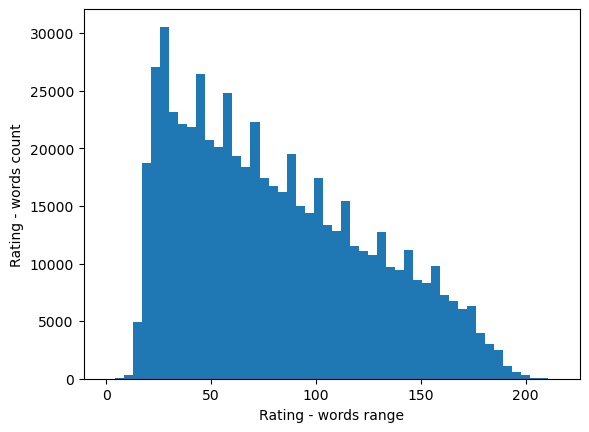

In [22]:
# Making a histogram of the Review Count variable.
_ = plt.hist(data[data['Rating'] ==3]['Review_wtoken_cnt'],bins=50)
_ = plt.xlabel('Rating - words range')
_ = plt.ylabel('Rating - words count')
plt.show()

In [23]:
def hist_matplot(data,bins_range,xlabel,ylabel,title="title"):
    _ = plt.hist(data,bins=bins_range)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.title(title)
    plt.show()

In [24]:
def confidence_interval(data,min,max):
    ci_range = np.percentile(data,[min,max])
    print("ci_range = ",ci_range)

Making a histogram of the Review Count variable for various ratings abnd their ci -range.

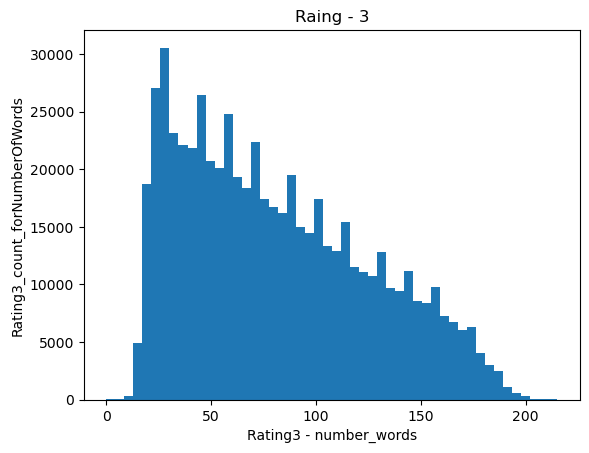

ci_range =  [ 20. 174.]


In [25]:
# rating 3
hist_matplot(data[data['Rating'] ==3]['Review_wtoken_cnt'],50,"Rating3 - number_words","Rating3_count_forNumberOfWords","Raing - 3")
confidence_interval(data[data['Rating'] ==3]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 3 are between 23 words and 194 words which is less than 200 words

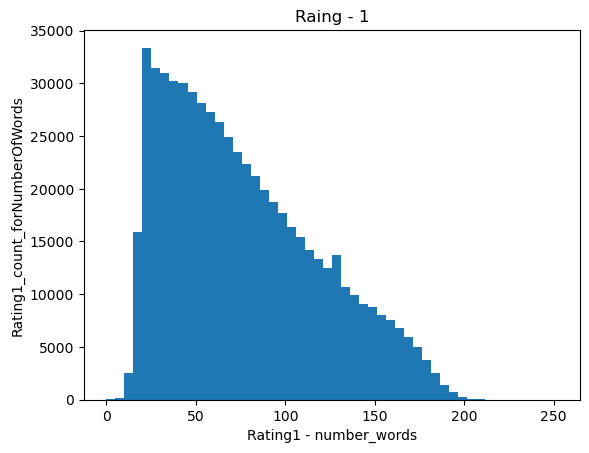

ci_range =  [ 20. 170.]


In [26]:
# rating 1
hist_matplot(data[data['Rating'] ==1]['Review_wtoken_cnt'],50,"Rating1 - number_words","Rating1_count_forNumberOfWords","Raing - 1")
confidence_interval(data[data['Rating'] ==1]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 1 are between 23 words and 191 words which is less than 200 words

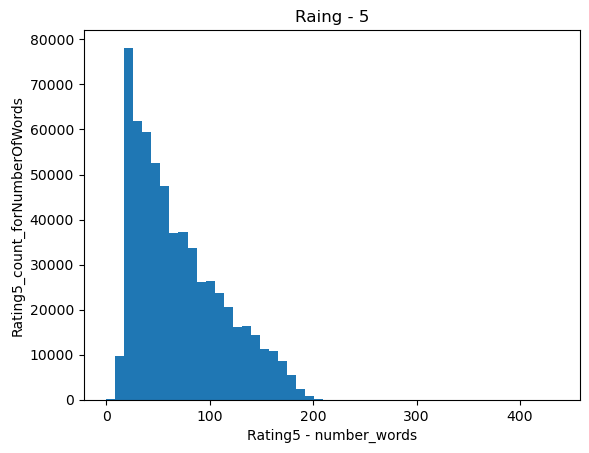

ci_range =  [ 19. 168.]


In [27]:
# rating 5
hist_matplot(data[data['Rating'] ==5]['Review_wtoken_cnt'],50,"Rating5 - number_words","Rating5_count_forNumberOfWords","Raing - 5")
confidence_interval(data[data['Rating'] ==5]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 5 are between 21 words and 188 words which is less than 200 words

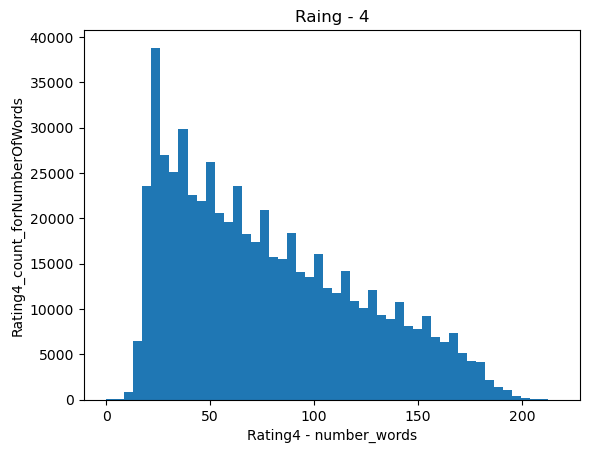

ci_range =  [ 20. 172.]


In [28]:
# rating 4
hist_matplot(data[data['Rating'] ==4]['Review_wtoken_cnt'],50,"Rating4 - number_words","Rating4_count_forNumberOfWords","Raing - 4")
confidence_interval(data[data['Rating'] ==4]['Review_wtoken_cnt'],2.5,97.5)

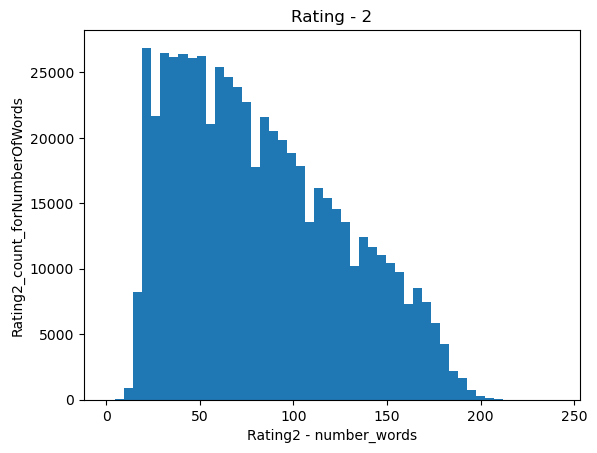

ci_range =  [ 21. 174.]


In [29]:
# rating 2
hist_matplot(data[data['Rating'] ==2]['Review_wtoken_cnt'],50,"Rating2 - number_words","Rating2_count_forNumberOfWords","Rating - 2")
confidence_interval(data[data['Rating'] ==2]['Review_wtoken_cnt'],2.5,97.5)

This shows the most of the Reviews for the Rating 2 are between 23 words and 194 words which is less than 200 words

The minimum words range used in most of the Reviews are between 21 to 194 words

In [30]:
import re
from collections import Counter

In [31]:
#Bar Chart of Top N Words (based on total frequency)
all_words = []
for text in data['Review_word_tokenize']:
    all_words.extend(re.findall(r'\b\w+\b', text.lower())) # Extract all words

In [32]:
def get_all_words(words):
    all_words = []
    for text in words:
       all_words.extend(re.findall(r'\b\w+\b', text.lower())) 
    return all_words

In [33]:
# Bar plot to show the Top Most Frequent words (by default 50 words)

def bar_most_frequent_words(top_words,top_counts,top_n=50,xlabel="Words"):
    plt.figure(figsize=(20, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel(xlabel)
    plt.ylabel('Total Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [34]:
word_counts = Counter(all_words)
top_n = 50  # Adjust as needed
most_common_words = word_counts.most_common(top_n)
print(most_common_words)
top_words, top_counts = zip(*most_common_words)

[('the', 12152284), ('i', 6860865), ('and', 6228668), ('a', 5900698), ('to', 5706292), ('it', 5413496), ('of', 4640299), ('this', 4121770), ('is', 4119713), ('in', 2777721), ('for', 2507823), ('that', 2488680), ('was', 2070152), ('you', 2010966), ('but', 1948980), ('not', 1851062), ('s', 1788604), ('with', 1705299), ('on', 1676154), ('t', 1548789), ('have', 1529360), ('book', 1527810), ('my', 1433593), ('as', 1360831), ('are', 1335015), ('be', 1085726), ('one', 1077853), ('if', 951346), ('so', 944159), ('all', 902658), ('like', 881915), ('they', 878832), ('very', 822801), ('good', 819965), ('just', 783420), ('at', 771382), ('from', 751715), ('would', 732736), ('or', 727526), ('can', 724648), ('out', 682389), ('about', 682281), ('an', 662594), ('more', 652827), ('great', 650642), ('me', 633887), ('has', 630268), ('there', 625116), ('had', 602725), ('what', 591893)]


In [35]:
# get top n most Frequent words
def get_top_most_frequent_words(words,top_n,xlabel):
    word_counts = Counter(get_all_words(words))
    most_common_words = word_counts.most_common(top_n)
    top_words, top_counts = zip(*most_common_words)
    print(top_words)
    bar_most_frequent_words(top_words,top_counts,top_n,xlabel)

('the', 'i', 'and', 'a', 'to', 'it', 'of', 'this', 'is', 'in', 'for', 'that', 'was', 'you', 'but', 'not', 's', 'with', 'on', 't', 'have', 'book', 'my', 'as', 'are', 'be', 'one', 'if', 'so', 'all', 'like', 'they', 'very', 'good', 'just', 'at', 'from', 'would', 'or', 'can', 'out', 'about', 'an', 'more', 'great', 'me', 'has', 'there', 'had', 'what', 'when', 'will', 'up', 'get', 'by', 'some', 'he', 'read', 'only', 'time', 'no', 'his', 'really', 'well', 'movie', 'your', 'much', 'than', 'other', 'do')


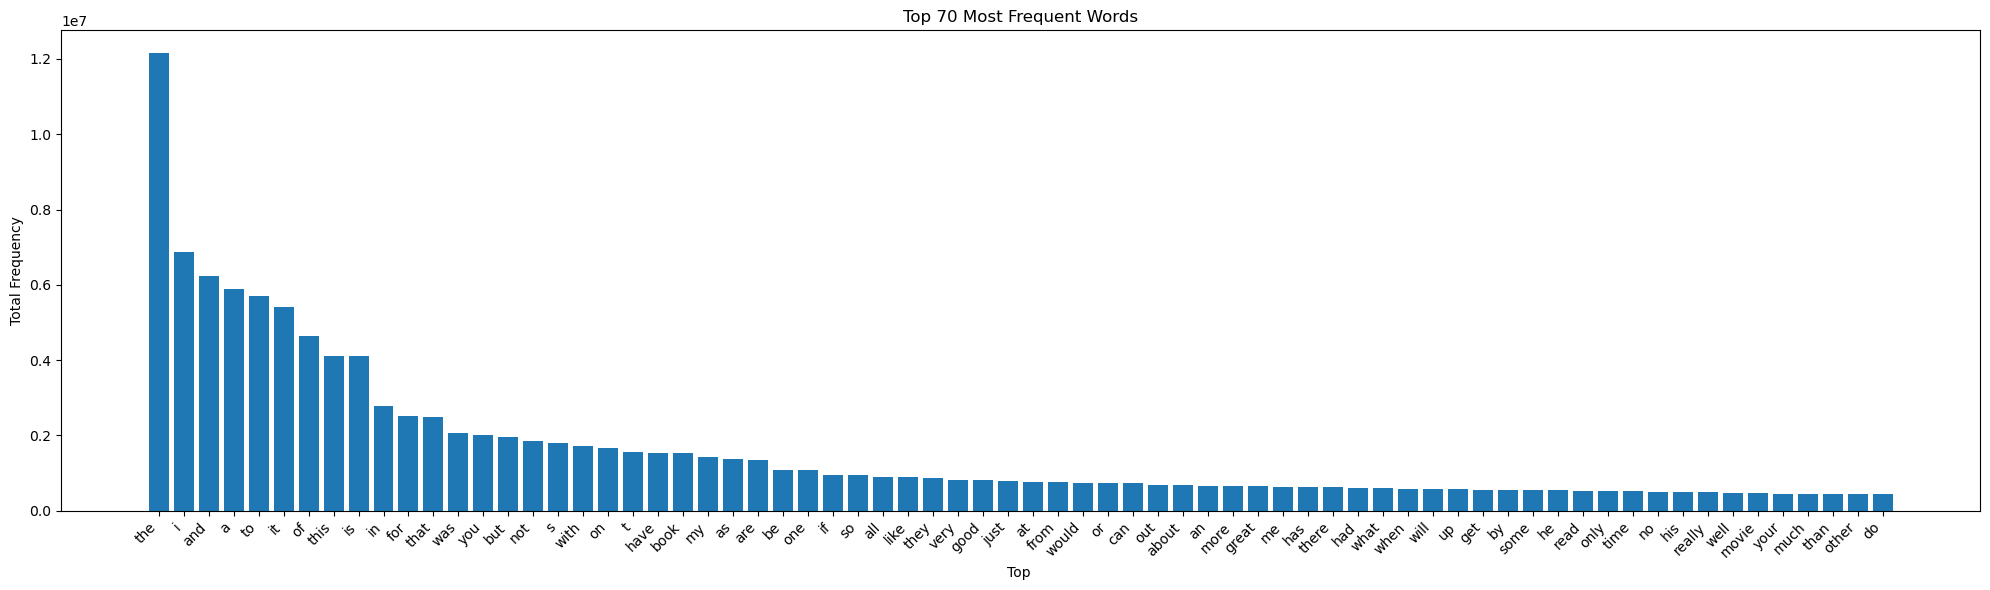

In [37]:
# most frequent words in Entire Dataset
get_top_most_frequent_words(data['Review_word_tokenize'],70,"Top ")

('the', 'i', 'a', 'and', 'to', 'it', 'of', 'is', 'this', 'in', 'that', 'but', 'for', 'was', 'not', 'you', 's', 'on', 'with', 't', 'book', 'have', 'as', 'are', 'my', 'be', 'if', 'good', 'one', 'like', 'so', 'they', 'just', 'all', 'would', 'very', 'more', 'at', 'or', 'from', 'there', 'some', 'out', 'an', 'about', 'can', 'me', 'had', 'has', 'what', 'when', 'up', 'get', 'great', 'really', 'by', 'he', 'much', 'will', 'his', 'read', 'only', 'than', 'other', 'well', 'movie', 'too', 'time', 'were', 'don')


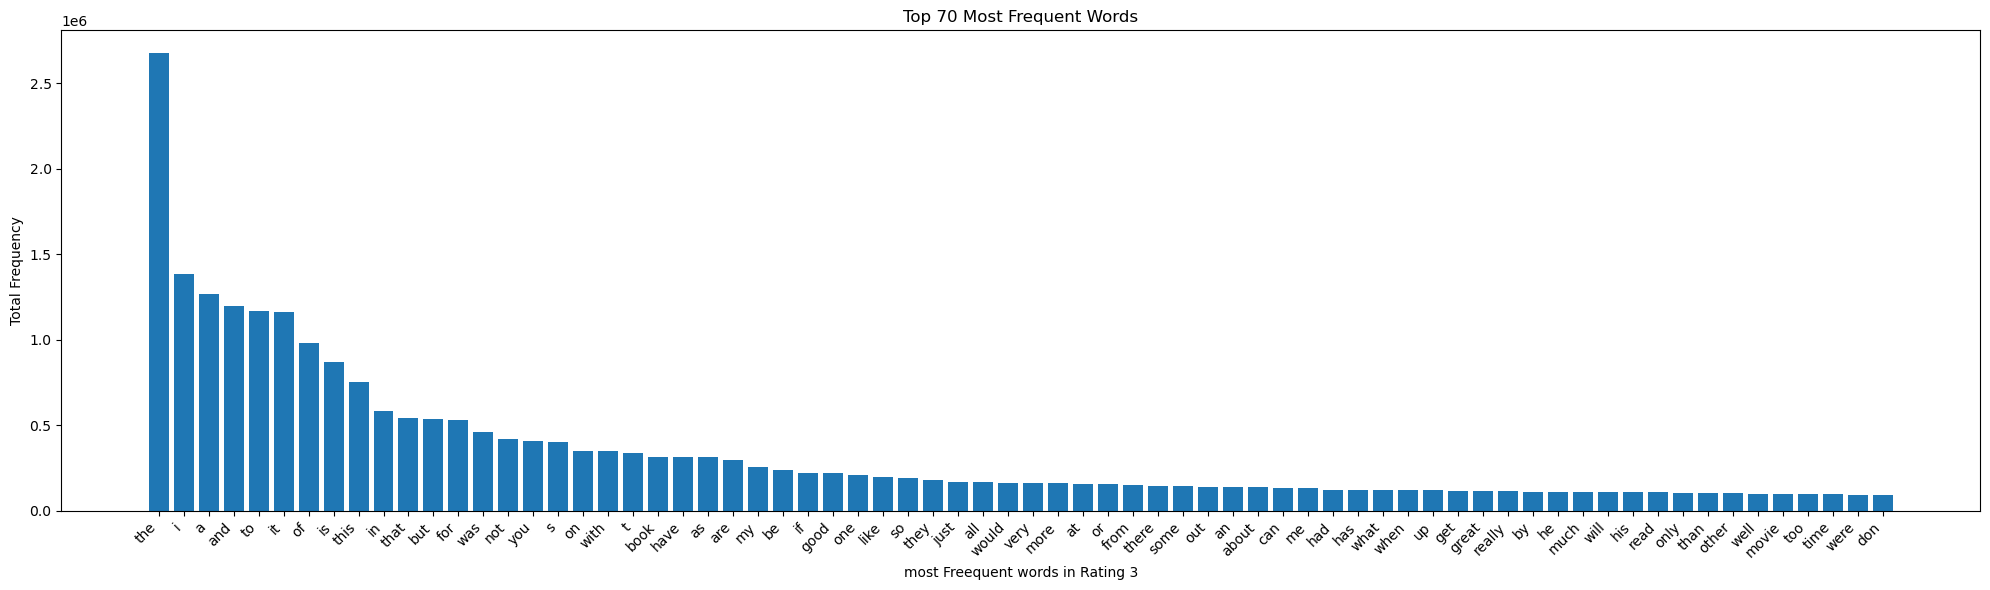

In [38]:
# most Freequent words in Rating 3
get_top_most_frequent_words(data[data['Rating']==3]['Review_word_tokenize'],70, "most Freequent words in Rating 3" )   

('the', 'and', 'i', 'a', 'to', 'it', 'of', 'this', 'is', 'in', 'for', 'you', 'that', 's', 'my', 'with', 'book', 'was', 'on', 'have', 'as', 'are', 'but', 'one', 'great', 't', 'not', 'all', 'so', 'be', 'very', 'can', 'they', 'if', 'like', 'has', 'from', 'at', 'an', 'just', 'read', 'will', 'about', 'me', 'good', 'love', 'out', 'or', 'he', 'more', 'his', 'when', 'what', 'by', 'well', 'time', 'up', 'we', 'who', 'had', 'would', 'best', 'your', 'get', 'her', 'there', 'really', 'them', 'cd', 'these')


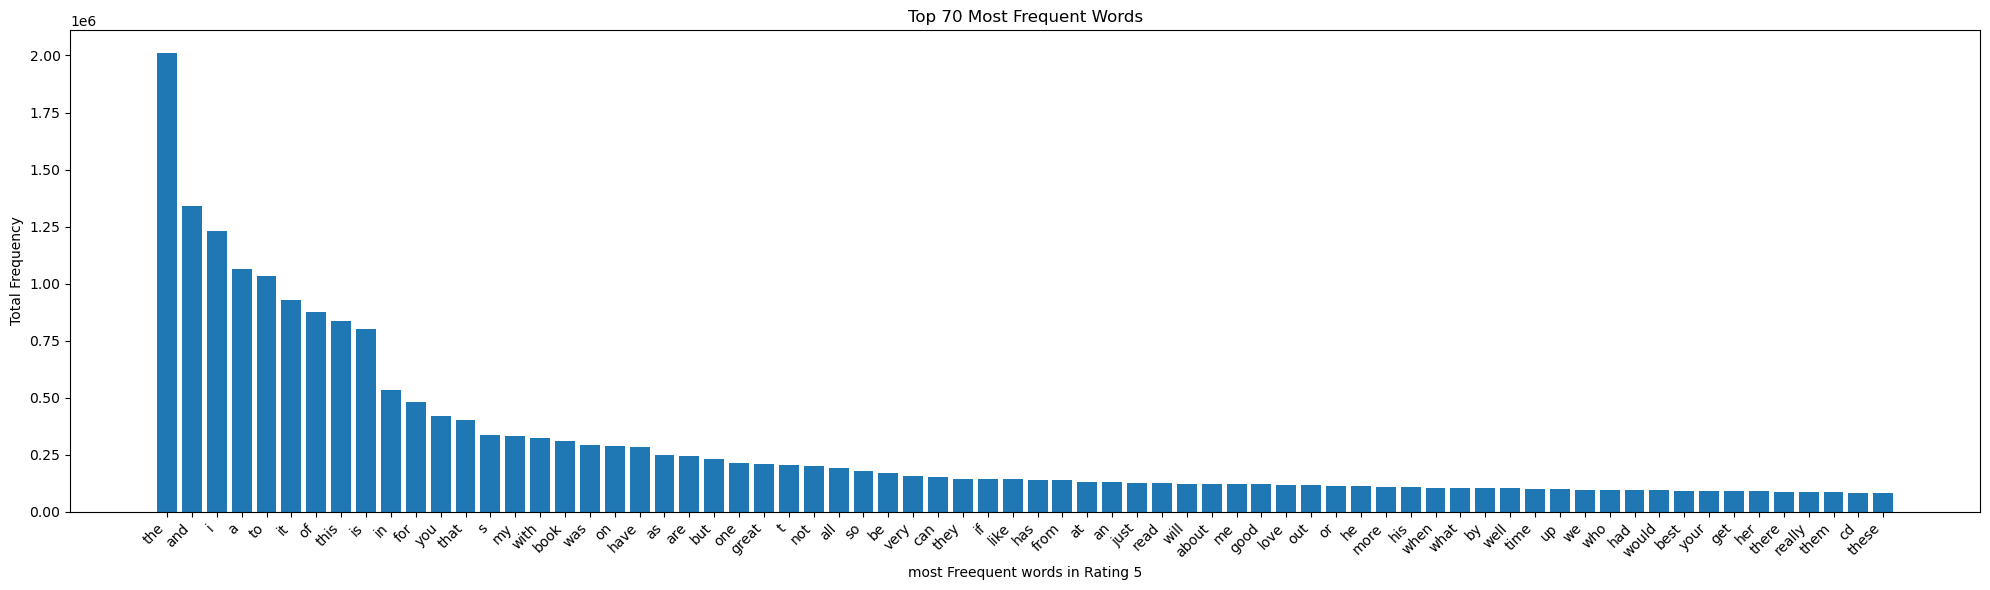

In [39]:
# most Freequent words in Rating 5
get_top_most_frequent_words(data[data['Rating']==5]['Review_word_tokenize'],70, "most Freequent words in Rating 5" ) 

# Univariate analysis

#### Review_str_len

In [ ]:
print("\nReview Length Statistics:\n", data['Review_str_len'].describe()) # Review_str_len - number of words in a particular review

Count (3,000,000) → The dataset has 3 million reviews, a large sample size for analysis.

Mean (414.03) → The average review length is 414 characters.

Standard Deviation (236.89) → There’s moderate variability in review lengths.

Minimum (4) → The shortest review contains only 4 characters, possibly very brief feedback.

25th Percentile (213) → 25% of reviews are shorter than 213 characters.

Median (367) → The middle review length is 367 characters, meaning half of the reviews are shorter and half are longer.

75th Percentile (580) → 75% of reviews are shorter than 580 characters.

Maximum (1010) → The longest review is 1010 characters, suggesting some users write very detailed feedback.

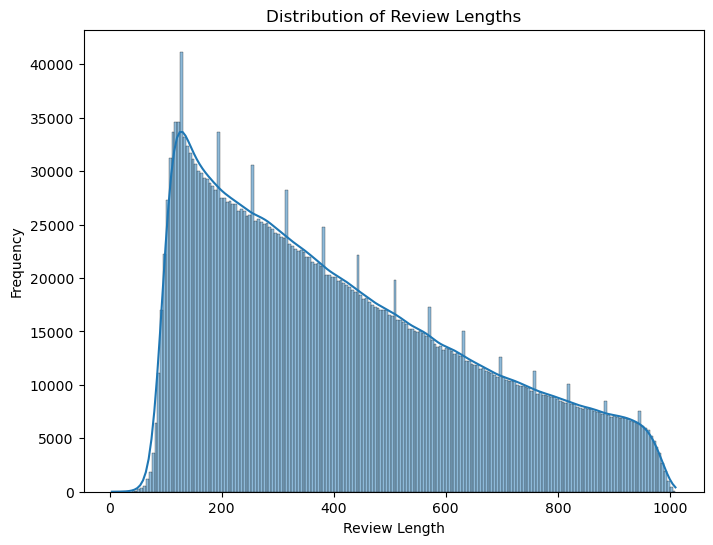

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Review_str_len'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

It is a right-skewed distribution, meaning most reviews are short to moderate in length, but there are some longer reviews that extend the range.

#### specific word frequency column (e.g., 'good')

In [ ]:
#print("\n'good' Frequency Statistics:\n", data['good'].describe())

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.histplot(data['good'], kde=False)
#plt.title('Distribution of "good" Frequency')
#plt.xlabel('Frequency of "good"')
#plt.ylabel('Frequency')
#plt.show()

# Correlation

In [41]:
# Compute Pearson correlation matrix for numerical features
numerical_features = ['Review_str_len', 'Title_str_len', 'title_wtoken_cnt', 'Review_wtoken_cnt', 'review_removed_cnt']
corr_matrix = data[numerical_features + ['Rating']].corr(method='pearson')

print("Pearson Correlation with Rating:\n", corr_matrix['Rating'])

Pearson Correlation with Rating:
 Review_str_len       -0.056518
Title_str_len        -0.003535
title_wtoken_cnt     -0.018061
Review_wtoken_cnt    -0.059104
review_removed_cnt   -0.042925
Rating                1.000000
Name: Rating, dtype: float64


##### Analysis
Review_str_len (-0.0565)	Slight negative correlation—longer reviews may slightly correlate with lower ratings.
Title_str_len (-0.0035)	Very weak correlation—title length barely affects rating.
title_wtoken_cnt (-0.0197)	Weak correlation—number of words in the title has little impact on rating.
Review_wtoken_cnt (-0.0604)	Slight negative correlation—longer reviews might slightly lean toward lower ratings.
review_removed_cnt (-0.0464)	Weak negative correlation—removed words (stop words, etc.) do not strongly impact rating.

Cramers V

In [42]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

categorical_features = ['Rating_Sentiment', 'Review_Title']
for feature in categorical_features:
    print(f"Cramér's V between Rating and {feature}: {cramers_v(data[feature], data['Rating'])}")

Cramér's V between Rating and Rating_Sentiment: 1.0
Cramér's V between Rating and Review_Title: 0.8970936886686504


In [ ]:
# The Cramers V highlights there is a relationship between Review's Title and Review-Sentiments.

Most Common Words (Bar Chart for Top N Words):

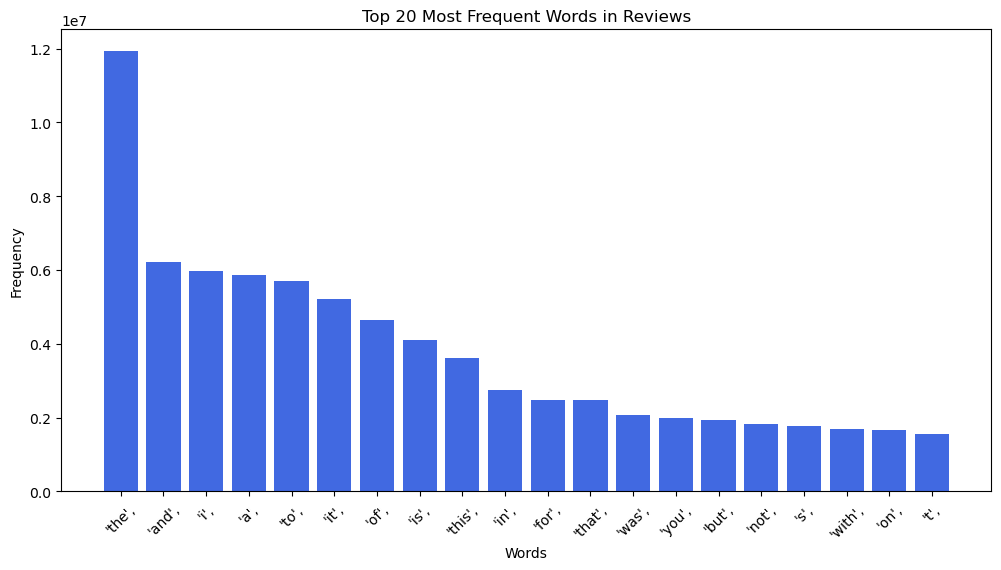

In [43]:
#Plotting Top 20 Most Frequent Words in Reviews in overall Reviews

word_counts = Counter(" ".join(data['Cleaned_Review']).split())
top_n_words = dict(word_counts.most_common(20))

plt.figure(figsize=(12,6))
plt.bar(top_n_words.keys(), top_n_words.values(), color='royalblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#### calculation of Lexical Diversity (the ratio of unique words to total words in a review)

In [17]:
data['lexical_diversity'] = data['Review_word_tokenize'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

In [ ]:
#### Analyze Lexical Diversity by Rating

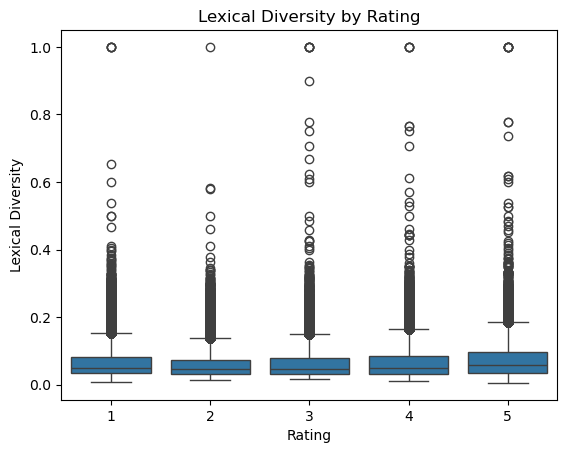

In [45]:
sns.boxplot(x=data['Rating'], y=data['lexical_diversity'])
plt.title("Lexical Diversity by Rating")
plt.xlabel("Rating")
plt.ylabel("Lexical Diversity")
plt.show()

In [ ]:
#### Analyze Lexical Diversity by Sentiment

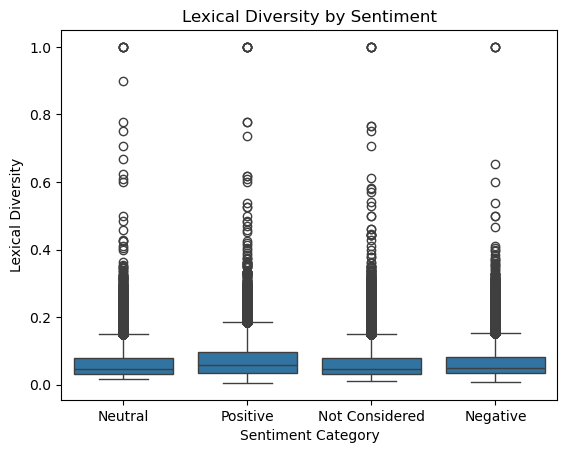

In [46]:
sns.boxplot(x=data['Rating_Sentiment'], y=data['lexical_diversity'])
plt.title("Lexical Diversity by Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Lexical Diversity")
plt.show()

In [ ]:
#### Compute Averages for Different Categories

In [47]:
print(data.groupby("Rating")["lexical_diversity"].mean())
print(data.groupby("Rating_Sentiment")["lexical_diversity"].mean())

Rating
1    0.061936
2    0.057274
3    0.060027
4    0.063344
5    0.069481
Name: lexical_diversity, dtype: float64
Rating_Sentiment
Negative          0.061936
Neutral           0.060027
Not Considered    0.060309
Positive          0.069481
Name: lexical_diversity, dtype: float64


In [48]:
data.shape

(3000000, 16)

In [18]:
filtered_data = data[data['Rating'].isin([1, 3, 5])]

In [69]:
word_columns = [col for col in filtered_data.columns if col not in ['Rating', 'Rating_Sentiment', 'Review_Title', 'Review', 'Review_str_len', 'Title_str_len', 'title_word_tokenize', 'Review_word_tokenize', 'title_wtoken_cnt', 'Review_wtoken_cnt', 'Cleaned_Review', 'review_punc_stop_words_removed', 'review_removed_cnt', 'porterStemmer', 'WordNet_Lemmatizer','likert_scale','lexical_diversity']]

In [70]:
word_columns

[]

In [19]:
# filtered_data[word_columns] has only the Amazon Reviews - words after DataWrangling for Rating 1,3,5.
filtered_data[word_columns].head() 

NameError: name 'word_columns' is not defined

In [20]:
filtered_data.head()
#filtered_data.columns

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,Cleaned_Review,review_punc_stop_words_removed,review_removed_cnt,porterStemmer,WordNet_Lemmatizer,lexical_diversity
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"['more', 'like', 'funchuck']","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",3,20,"['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...","['gave', 'dad', 'gag', 'gift', 'directing', 'n...",9,"['gave', 'dad', 'gag', 'gift', 'directing', 'n...","['gave', 'dad', 'gag', 'gift', 'directing', 'n...",0.160000
1,5,Positive,inspiring,i hope a lot of people hear this cd we need m...,204,9,['inspiring'],"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",1,38,"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...","['hope', 'lot', 'people', 'hear', 'need', 'str...",22,"['hope', 'lot', 'people', 'hear', 'need', 'str...","['hope', 'lot', 'people', 'hear', 'need', 'str...",0.086538
2,5,Positive,the best soundtrack ever to anything,i m reading a lot of reviews saying that this ...,470,37,"['the', 'best', 'soundtrack', 'ever', 'to', 'a...","['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...",6,96,"['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...","['reading', 'lot', 'saying', 'best', 'game', '...",34,"['reading', 'lot', 'saying', 'best', 'game', '...","['reading', 'lot', 'saying', 'best', 'game', '...",0.035904
4,5,Positive,too good to be true,probably the greatest soundtrack in history u...,377,19,"['too', 'good', 'to', 'be', 'true']","['probably', 'the', 'greatest', 'soundtrack', ...",5,67,"['probably', 'the', 'greatest', 'soundtrack', ...","['probably', 'greatest', 'soundtrack', 'histor...",28,"['probably', 'greatest', 'soundtrack', 'histor...","['probably', 'greatest', 'soundtrack', 'histor...",0.051327
5,5,Positive,there s a reason for the price,there s a reason this cd is so expensive even...,193,30,"['there', 's', 'a', 'reason', 'for', 'the', 'p...","['there', 's', 'a', 'reason', 'this', 'cd', 'i...",7,41,"['there', 's', 'a', 'reason', 'this', 'cd', 'i...","['reason', 'expensive', 'version', 'import', '...",11,"['reason', 'expensive', 'version', 'import', '...","['reason', 'expensive', 'version', 'import', '...",0.083067


# Splitting the Data to prevent Data Leakage

In [91]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop('Rating', axis=1)
y = filtered_data['Rating']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

--- Fitting PCA with all components to generate the explained variance plot ---

Number of components to explain 90% of the variance: 93
Number of components to explain 95% of the variance: 251

--- Running PCA with n_components = 1 ---
Component 1: 0.6344 variance explained.
Total cumulative variance explained by 1 components: 0.6344


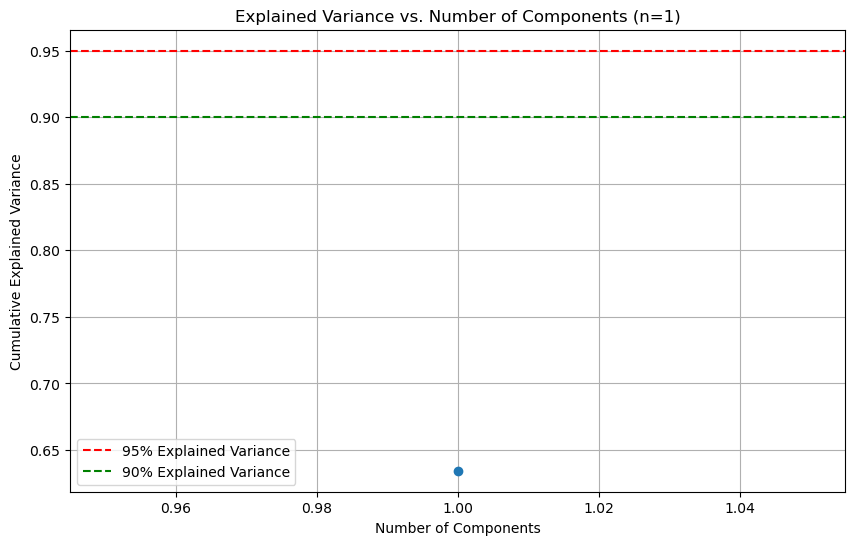


--- Running PCA with n_components = 2 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Total cumulative variance explained by 2 components: 0.7924


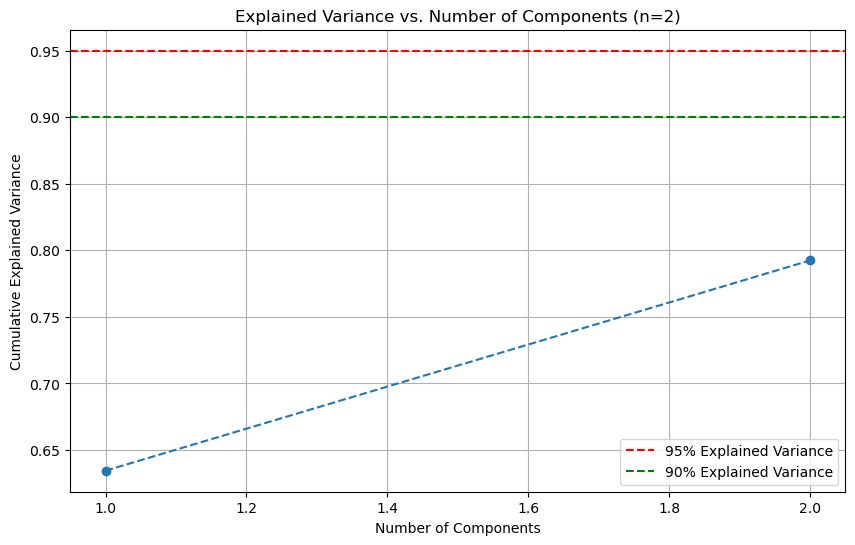


--- Running PCA with n_components = 3 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Total cumulative variance explained by 3 components: 0.8324


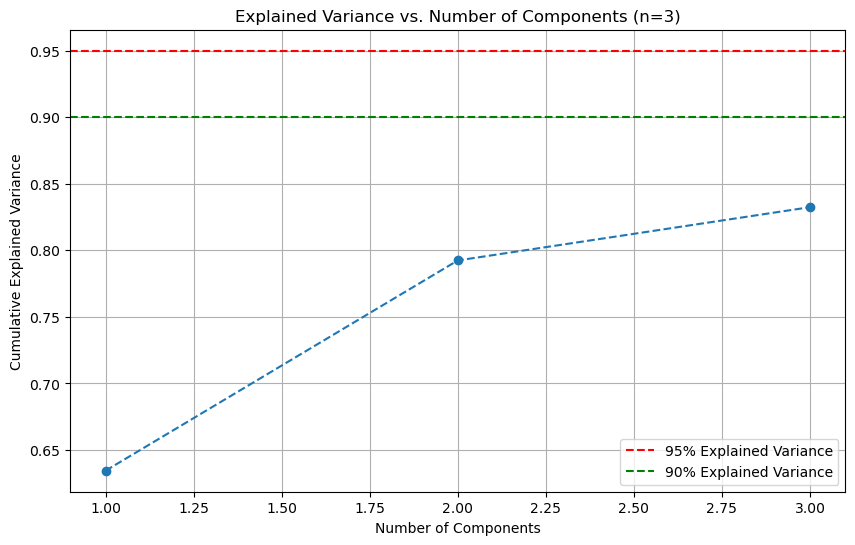


--- Running PCA with n_components = 4 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Component 4: 0.0058 variance explained.
Total cumulative variance explained by 4 components: 0.8383


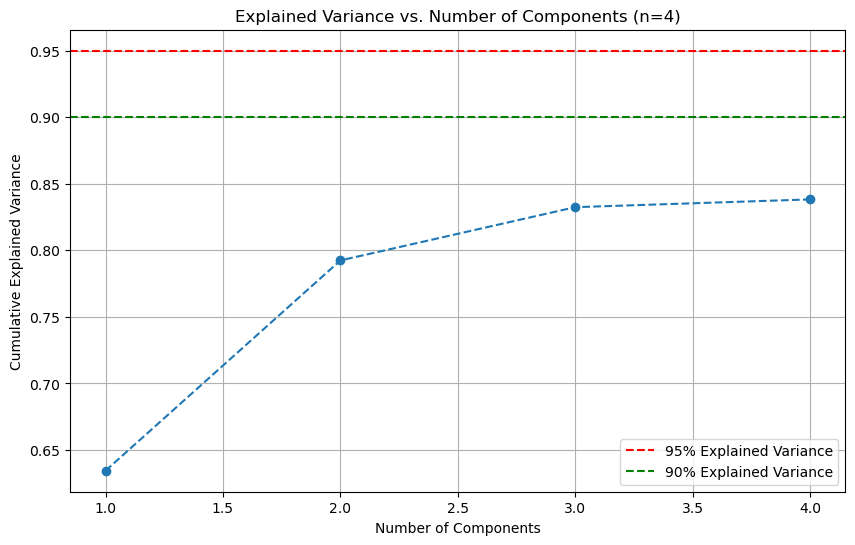


--- Running PCA with n_components = 5 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Component 4: 0.0058 variance explained.
Component 5: 0.0038 variance explained.
Total cumulative variance explained by 5 components: 0.8421


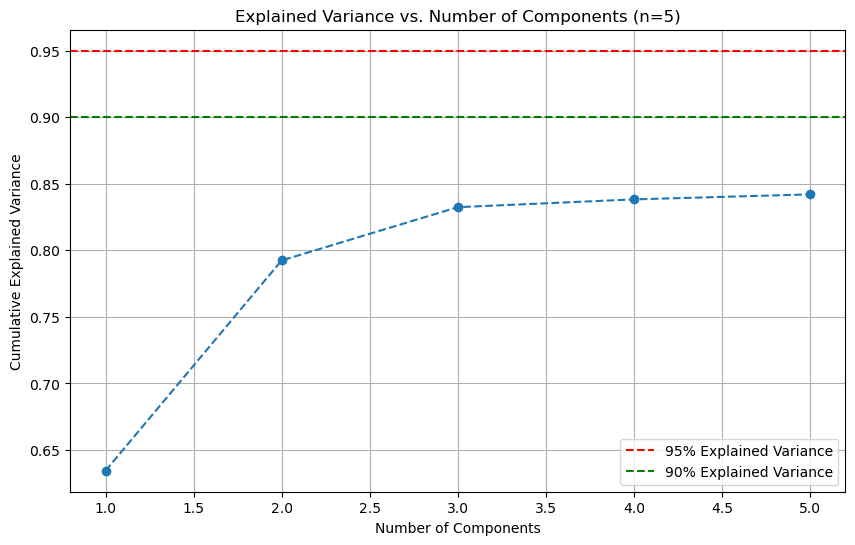


--- Running PCA with n_components = 6 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Component 4: 0.0058 variance explained.
Component 5: 0.0038 variance explained.
Component 6: 0.0022 variance explained.
Total cumulative variance explained by 6 components: 0.8443


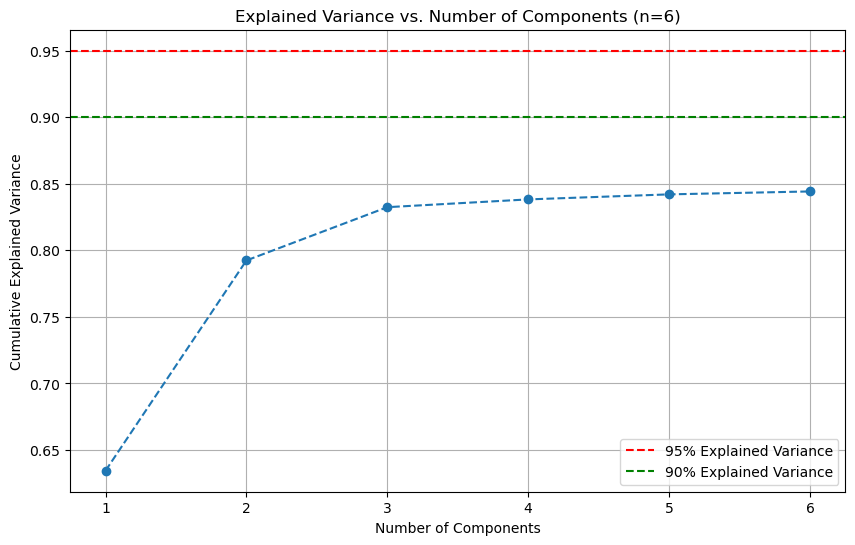

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Suppress RuntimeWarning from scikit-learn
warnings.filterwarnings('ignore', category=RuntimeWarning)


# Fill any potential NaN values in the text column
X_train['WordNet_Lemmatizer'] = X_train['WordNet_Lemmatizer'].fillna('')

# Define the columns for TF-IDF and other numerical features
text_features = 'WordNet_Lemmatizer'
numerical_features = ['Review_str_len', 'Title_str_len', 'Review_wtoken_cnt', 'lexical_diversity', 'review_removed_cnt']

# Drop rows with missing values in numerical columns
cleaned_data = X_train.dropna(subset=numerical_features)


# --- 2. Create the preprocessing and PCA pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        # Lowering max_features and using float32 to save memory
        ('text', TfidfVectorizer(max_features=500, stop_words='english', dtype=np.float32), text_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create a pipeline that first preprocesses the data and then applies PCA with all components
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=None))
])


# --- 3. Fit the full PCA model and generate the variance plot ---
print("--- Fitting PCA with all components to generate the explained variance plot ---")
try:
    pca_pipeline.fit(cleaned_data)
except ValueError as e:
    print(f"An error occurred during PCA. This could be due to all-zero features after TF-IDF. Error: {e}")
    exit()

# Extract the fitted PCA model
pca_model = pca_pipeline.named_steps['pca']

# Get explained variance ratio
explained_variance_ratio = pca_model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



# Find the number of components for 90% and 95% variance
num_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"\nNumber of components to explain 90% of the variance: {num_components_90}")
print(f"Number of components to explain 95% of the variance: {num_components_95}")


# --- 4. Loop through specific component counts and report results ---
n_components_list = [1,2, 3, 4,5,6]

for n in n_components_list:
    print(f"\n--- Running PCA with n_components = {n} ---")
    
    # Create and fit a new pipeline with the specific number of components
    pca_pipeline_loop = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=n))
    ])

    try:
        pca_pipeline_loop.fit(cleaned_data)
    except ValueError as e:
        print(f"An error occurred during PCA. Error: {e}")
        continue

    # Extract the fitted PCA model from this loop's pipeline
    pca_model_loop = pca_pipeline_loop.named_steps['pca']

    # Get explained variance ratio for this run
    explained_variance_ratio_loop = pca_model_loop.explained_variance_ratio_
    cumulative_explained_variance_loop = np.cumsum(explained_variance_ratio_loop)

    # Print the explained variance for each component in this loop
    for i, var in enumerate(explained_variance_ratio_loop):
        print(f"Component {i+1}: {var:.4f} variance explained.")

    print(f"Total cumulative variance explained by {n} components: {cumulative_explained_variance_loop[-1]:.4f}")

    # Plot the explained variance ratio for this specific number of components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance_loop) + 1), cumulative_explained_variance_loop, marker='o', linestyle='--')
    plt.title(f'Explained Variance vs. Number of Components (n={n})')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
    plt.legend()
    plt.grid(True)
    
    # Note: These lines will only be visible if n is large enough
    if n >= num_components_90:
        plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
    if n >= num_components_95:
        plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    
    plt.legend()
    plt.show()

In [131]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_model.explained_variance_ratio_)
print(cumulative_explained_variance)

[0.63438425 0.79239465 0.83243184 0.83827084 0.84205425 0.84425392
 0.84616661 0.84763856 0.84894747 0.85013695 0.85128472 0.85239958
 0.85344683 0.85445416 0.85545239 0.85641716 0.85732043 0.85820971
 0.85908166 0.85992029 0.86075384 0.86156869 0.86238203 0.86318145
 0.86395664 0.86472141 0.86546807 0.86618938 0.86690105 0.86760046
 0.86827044 0.86892751 0.86958352 0.87023603 0.87087999 0.8715159
 0.87215001 0.87277533 0.87339135 0.87399986 0.87460398 0.87519686
 0.8757847  0.87635963 0.87693076 0.87749799 0.87806184 0.87862387
 0.87918237 0.87973484 0.88028576 0.88083346 0.88137773 0.88191885
 0.88245806 0.88299296 0.88352442 0.88404963 0.88457371 0.88509335
 0.88561042 0.88612444 0.88663582 0.88714582 0.88765226 0.88815588
 0.8886581  0.88915346 0.88964667 0.89013489 0.89061861 0.89109786
 0.89157433 0.89204536 0.89251257 0.89297767 0.89343839 0.89389392
 0.89434518 0.89479423 0.89523742 0.89567743 0.89611529 0.89654754
 0.89697824 0.89740742 0.89783537 0.89826091 0.89868575 0.89910

In [152]:
print(f"The last element of the array is: {cumulative_explained_variance[-1]:.10f}")

The last element of the array is: 0.9999362019



Number of components to explain 90% of the variance: 93
Number of components to explain 95% of the variance: 251
Number of components to explain 100% of the variance: 504


--- Fitting PCA with all components to generate the explained variance plot ---


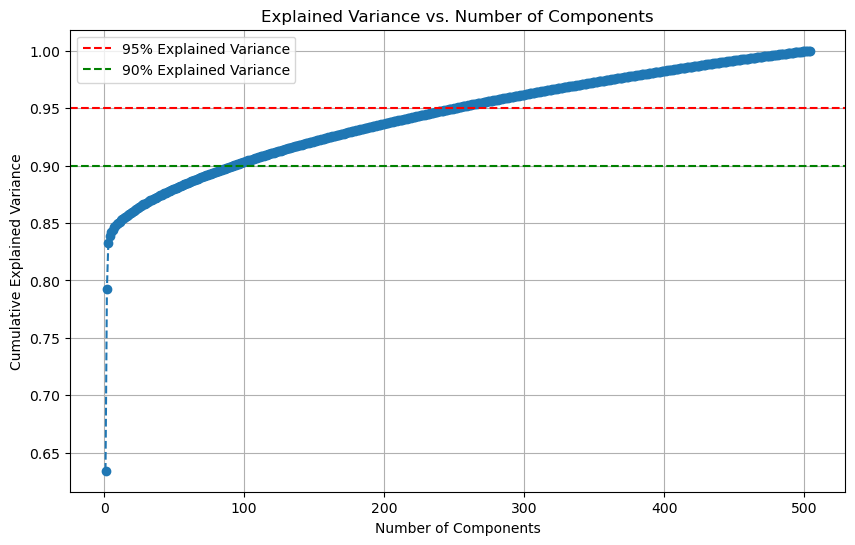


Number of components to explain 90% of the variance: 93
Number of components to explain 95% of the variance: 251
Number of components to explain 100% of the variance: 504

--- Running PCA with n_components = 1 ---
Component 1: 0.6344 variance explained.
Total cumulative variance explained by 1 components: 0.6344

--- Running PCA with n_components = 2 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Total cumulative variance explained by 2 components: 0.7924

--- Running PCA with n_components = 3 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Total cumulative variance explained by 3 components: 0.8324

--- Running PCA with n_components = 4 ---
Component 1: 0.6344 variance explained.
Component 2: 0.1580 variance explained.
Component 3: 0.0400 variance explained.
Component 4: 0.0058 variance explained.
Total cumulative variance explained by 4 components: 0.8383

--- Running PCA

In [156]:
# Determining the PCA for all and upto 6 components
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Suppress RuntimeWarning from scikit-learn
warnings.filterwarnings('ignore', category=RuntimeWarning)


# Fill any potential NaN values in the text column
X_train['WordNet_Lemmatizer'] = X_train['WordNet_Lemmatizer'].fillna('')

# Define the columns for TF-IDF and other numerical features
text_features = 'WordNet_Lemmatizer'
numerical_features = ['Review_str_len', 'Title_str_len', 'Review_wtoken_cnt', 'lexical_diversity', 'review_removed_cnt']

# Drop rows with missing values in numerical columns
cleaned_data = X_train.dropna(subset=numerical_features)


# --- 2. Create the preprocessing and PCA pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        # Lowering max_features and using float32 to save memory
        ('text', TfidfVectorizer(max_features=500, stop_words='english', dtype=np.float32), text_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create a pipeline that first preprocesses the data and then applies PCA with all components
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=None))
])


# --- 3. Fit the full PCA model and generate the variance plot ---
print("--- Fitting PCA with all components to generate the explained variance plot ---")
try:
    pca_pipeline.fit(cleaned_data)
except ValueError as e:
    print(f"An error occurred during PCA. This could be due to all-zero features after TF-IDF. Error: {e}")
    exit()

# Extract the fitted PCA model
pca_model = pca_pipeline.named_steps['pca']

# Get explained variance ratio
explained_variance_ratio = pca_model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.show()

# Find the number of components for 90% and 95% variance
num_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
tolerance = 1e-8 # A very small number
num_components_100_t = np.argmax(cumulative_explained_variance >= (1.0 - tolerance)) + 1
num_components_gt_99 = np.argmax(cumulative_explained_variance > 0.9999) + 1

print(f"\nNumber of components to explain 90% of the variance: {num_components_90}")
print(f"Number of components to explain 95% of the variance: {num_components_95}")
print(f"Number of components to explain 100% of the variance: {num_components_gt_99}")


# --- 4. Loop through specific component counts and report results ---
n_components_list = [1,2, 3, 4,5,6]

for n in n_components_list:
    print(f"\n--- Running PCA with n_components = {n} ---")
    
    # Create and fit a new pipeline with the specific number of components
    pca_pipeline_loop = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=n))
    ])

    try:
        pca_pipeline_loop.fit(cleaned_data)
    except ValueError as e:
        print(f"An error occurred during PCA. Error: {e}")
        continue

    # Extract the fitted PCA model from this loop's pipeline
    pca_model_loop = pca_pipeline_loop.named_steps['pca']

    # Get explained variance ratio for this run
    explained_variance_ratio_loop = pca_model_loop.explained_variance_ratio_
    cumulative_explained_variance_loop = np.cumsum(explained_variance_ratio_loop)

    # Print the explained variance for each component in this loop
    for i, var in enumerate(explained_variance_ratio_loop):
        print(f"Component {i+1}: {var:.4f} variance explained.")

    print(f"Total cumulative variance explained by {n} components: {cumulative_explained_variance_loop[-1]:.4f}")

--- Fitting PCA with all components to generate the explained variance plot ---
PCA(n_components=3)


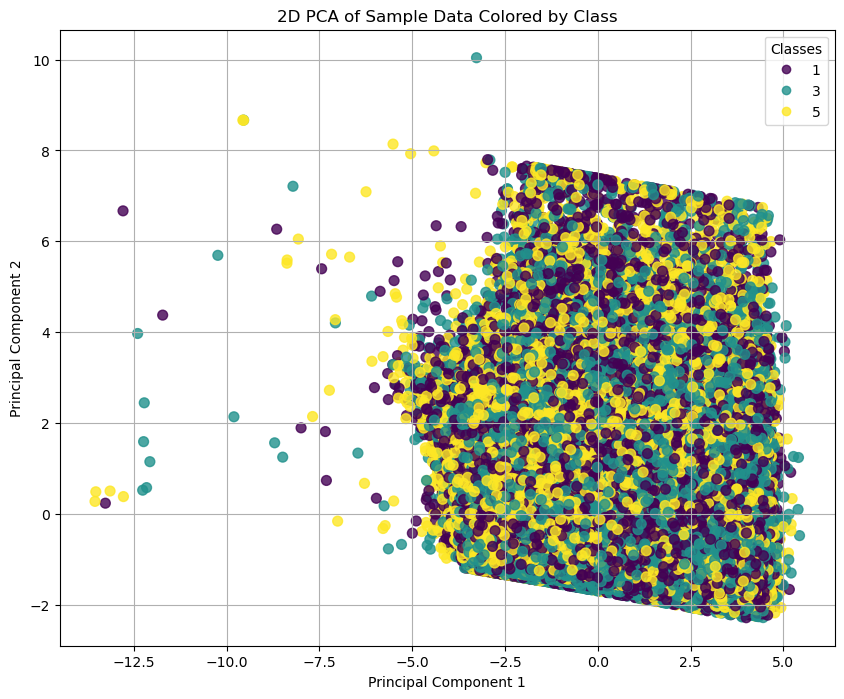

Explained Variance by PC1: 0.63
Explained Variance by PC2: 0.16
Explained Variance by PC2: 0.04
Total Variance Explained: 1.00


In [93]:
# Suppress RuntimeWarning from scikit-learn
warnings.filterwarnings('ignore', category=RuntimeWarning)

# utilizing PCA to use only 3 components because the elbow curve is at 3.

preprocessor = ColumnTransformer(
    transformers=[
        # Lowering max_features and using float32 to save memory
        ('text', TfidfVectorizer(max_features=500, stop_words='english', dtype=np.float32), text_features),
        ('num', StandardScaler(), numerical_features)
    ])

component_3_pipeline = [
    ('preprocessor', preprocessor),
    ('pca',PCA(n_components=3))
]


text_pipeline = Pipeline(component_3_pipeline)

# --- 3. Fit the full PCA model and generate the variance plot ---
print("--- Fitting PCA with all components to generate the explained variance plot ---")
try:
    text_pipeline.fit(X_train)
except ValueError as e:
    print(f"An error occurred during PCA. This could be due to all-zero features after TF-IDF. Error: {e}")
    exit()

# Extract the fitted PCA model
pca_model_3 = text_pipeline.named_steps['pca']

print(pca_model_3)


# Get explained variance ratio
explained_variance_ratio = pca_model_3.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

X_train_pca = text_pipeline.fit_transform(X_train)

# Validation/Test set: apply only
X_val_pca = text_pipeline.transform(X_val)

# You can now use X_pca_transformed and y to create your scatter plot.
pca_df = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Rating'] = y_train.values

# --- Step 5: Create the scatter plot ---
plt.figure(figsize=(10, 8))

# Use the 'scatter' function to plot the data
scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Rating'],  # 'c' for color, using the 'Target' column
    cmap='viridis',      # 'cmap' is the colormap for the colors
    s=50,                # 's' for marker size
    alpha=0.8            # 'alpha' for transparency
)

# Add labels and a title for clarity
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Sample Data Colored by Class')

# Add a legend to the plot
legend = plt.legend(*scatter.legend_elements(), title="Classes")
# Optionally, you can customize the legend labels if they are not clear
# legend.get_texts()[0].set_text('Class A')
# legend.get_texts()[1].set_text('Class B')

plt.grid(True)
plt.show()

# Print the explained variance by the first two components
print(f"Explained Variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained Variance by PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Explained Variance by PC2: {pca.explained_variance_ratio_[2]:.2f}")
print(f"Total Variance Explained: {np.sum(pca.explained_variance_ratio_):.2f}")

In [101]:
# Use the 'scatter' function to plot the data
def create_scatterplot(pc1,pc2,xlabel,ylabel):
    scatter = plt.scatter(
        pc1,
        pc2,
        c=pca_df['Rating'],  # 'c' for color, using the 'Target' column
        cmap='viridis',      # 'cmap' is the colormap for the colors
        s=50,                # 's' for marker size
        alpha=0.8            # 'alpha' for transparency
    )

    # Add labels and a title for clarity
    plt.xlabel(f'Principal Component {xlabel}')
    plt.ylabel(f'Principal Component {ylabel}')
    plt.title('2D PCA Components of Sample Data Colored by Class')

    # Add a legend to the plot
    legend = plt.legend(*scatter.legend_elements(), title="Classes")

    plt.grid(True)
    plt.show()

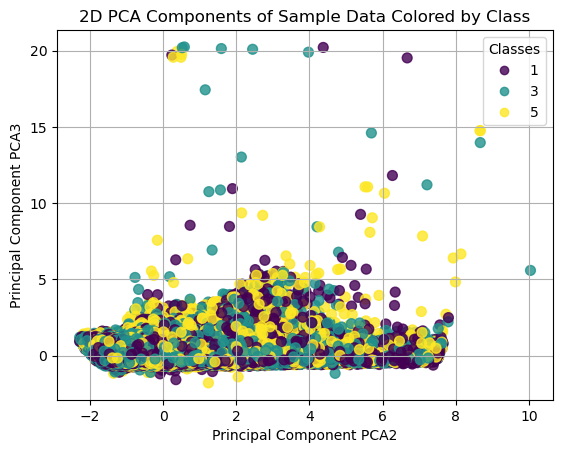

In [102]:
create_scatterplot(pca_df['PCA2'],pca_df['PCA3'],'PCA2','PCA3' )

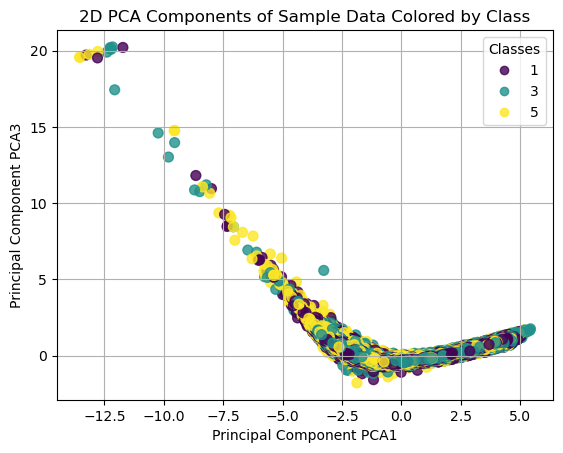

In [103]:
create_scatterplot(pca_df['PCA1'],pca_df['PCA3'],'PCA1','PCA3' )

In [108]:
loadings_3 = pca_model_3.components_

In [110]:
print(loadings_3.shape)

(3, 505)


In [116]:
# Example of what you should print
print("Shape of pca.components_:", pca_model_3.components_.shape)
# This will be (n_components, n_features) -> (3, 15) in this case

print("Shape of pca.components_.T:", pca_model_3.components_.T.shape)
# This will be (n_features, n_components) -> (15, 3)

# The data you were using
print("Shape of transformed data (principal_components):", X_train_pca.shape)
# This will be (n_samples, n_components) -> (505, 3)

Shape of pca.components_: (3, 505)
Shape of pca.components_.T: (505, 3)
Shape of transformed data (principal_components): (1440000, 3)


In [117]:
pca_model_3.components_.shape[1]

505

In [118]:
# Create a list of names for our original features
feature_names = [f'Feature_{i+1}' for i in range(pca_model_3.components_.shape[1])]

# Create a DataFrame to make the loadings easy to read
loadings_df = pd.DataFrame(
    data=loadings_3.T,  # We transpose the matrix for better readability
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(pca_model_3.n_components_)]
)

In [119]:
print("Correct Loadings DataFrame Shape:", loadings_df.shape)
print("\nPCA Loadings:")
print(loadings_df.head()) # Print the top rows to save space

Correct Loadings DataFrame Shape: (505, 3)

PCA Loadings:
                PC1       PC2       PC3
Feature_1  0.000851 -0.000281 -0.001258
Feature_2  0.000242 -0.000164 -0.000415
Feature_3  0.000301 -0.000162  0.000381
Feature_4  0.000743 -0.000057  0.000887
Feature_5  0.000433 -0.000129  0.000541


In [37]:
# --- 4. Add the PCA components to the original DataFrame ---
# Create a DataFrame from the transformed data with meaningful column names
pca_df = pd.DataFrame(data=first_three_pca_components, columns=['PCA1', 'PCA2', 'PCA3'], index=cleaned_data.index)

In [ ]:


# Join the new PCA DataFrame with the original cleaned data
final_data = cleaned_data.join(pca_df)

# --- 5. Display the head of the updated DataFrame ---
print("\nDataFrame head with PCA components added:")
print(final_data.head())

# Apply PCA to reduce dimensions
#pca = PCA(n_components=3)
#tfidf_pca = pca.fit_transform(filtered_data[word_columns])

# Add PCA results to DataFrame
#filtered_data = filtered_data.copy()
#filtered_data['PCA1'], filtered_data['PCA2'], filtered_data['PCA3'] = tfidf_pca[:, 0], tfidf_pca[:, 1], tfidf_pca[:, 2]

In [40]:
explained_variance = pca_model_loop.explained_variance_ratio_ # This shows the percentage increase when component =1 ,2,3,4,5,6 are used so after component=3.
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.63440814 0.15797914 0.04003567 0.00584618 0.0037863  0.0022013 ]


In [104]:
"""# Scatter plot by Rating
plt.figure(figsize=(10,6))
plt.scatter(final_data['PCA1'], final_data['PCA2'], c=filtered_data['Rating'], cmap='coolwarm', alpha=0.7)
plt.axis('equal')
plt.colorbar(label="Rating")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("TF-IDF Feature Projection using PCA for components 1 and 2")
plt.show() """

'# Scatter plot by Rating\nplt.figure(figsize=(10,6))\nplt.scatter(final_data[\'PCA1\'], final_data[\'PCA2\'], c=filtered_data[\'Rating\'], cmap=\'coolwarm\', alpha=0.7)\nplt.axis(\'equal\')\nplt.colorbar(label="Rating")\nplt.xlabel("PCA Component 1")\nplt.ylabel("PCA Component 2")\nplt.title("TF-IDF Feature Projection using PCA for components 1 and 2")\nplt.show() '

In [105]:
"""# Scatter plot by Rating
plt.figure(figsize=(10,6))
plt.scatter(final_data['PCA1'], final_data['PCA3'], c=filtered_data['Rating'], cmap='coolwarm', alpha=0.7)
plt.axis('equal')
plt.colorbar(label="Rating")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 3")
plt.title("TF-IDF Feature Projection using PCA for components 1 and 3")
plt.show() """

'# Scatter plot by Rating\nplt.figure(figsize=(10,6))\nplt.scatter(final_data[\'PCA1\'], final_data[\'PCA3\'], c=filtered_data[\'Rating\'], cmap=\'coolwarm\', alpha=0.7)\nplt.axis(\'equal\')\nplt.colorbar(label="Rating")\nplt.xlabel("PCA Component 1")\nplt.ylabel("PCA Component 3")\nplt.title("TF-IDF Feature Projection using PCA for components 1 and 3")\nplt.show() '

In [106]:
""" # Scatter plot by Rating
plt.figure(figsize=(10,6))
plt.scatter(final_data['PCA2'], final_data['PCA3'], c=filtered_data['Rating'], cmap='coolwarm', alpha=0.7)
plt.axis('equal')
plt.colorbar(label="Rating")
plt.xlabel("PCA Component 2")
plt.ylabel("PCA Component 3")
plt.title("TF-IDF Feature Projection using PCA for components 2 and 3")
plt.show() """

' # Scatter plot by Rating\nplt.figure(figsize=(10,6))\nplt.scatter(final_data[\'PCA2\'], final_data[\'PCA3\'], c=filtered_data[\'Rating\'], cmap=\'coolwarm\', alpha=0.7)\nplt.axis(\'equal\')\nplt.colorbar(label="Rating")\nplt.xlabel("PCA Component 2")\nplt.ylabel("PCA Component 3")\nplt.title("TF-IDF Feature Projection using PCA for components 2 and 3")\nplt.show() '

In [ ]:
print("Shape of PCA components:", pca.components_.T.shape)  # Expected: (num_features, num_components)
print("Length of word_columns_pca:", len(word_columns))  # Should match `num_features`


In [122]:
#Prining to see the PCA words for vaious components Descending wise
important_features_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False)
important_features_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False)
important_features_pc3 = loadings_df['PC3'].abs().sort_values(ascending=False)

print("Top Features for PCA1:\n", important_features_pc1.head(5))
print("Top Features for PCA2:\n", important_features_pc2.head(5))
print("Top Features for PCA2:\n", important_features_pc3.head(5))

Top Features for PCA1:
 Feature_501    0.507432
Feature_503    0.505381
Feature_505    0.501559
Feature_504    0.463030
Feature_502    0.143495
Name: PC1, dtype: float64
Top Features for PCA2:
 Feature_502    0.989498
Feature_503    0.085190
Feature_501    0.071845
Feature_505    0.068269
Feature_504    0.060875
Name: PC2, dtype: float64
Top Features for PCA2:
 Feature_504    0.882196
Feature_505    0.316173
Feature_501    0.258722
Feature_503    0.233195
Feature_502    0.006400
Name: PC3, dtype: float64


In [ ]:
# The PCA Component1 Vs Component2 did not show any clear differentiation for various permutations of Components1,2,3.

In [159]:
import scipy.stats as stats
# Pearson Correlation of PCA Feature1 and PCA2

print(stats.pearsonr(loadings_df['PC1'], loadings_df['PC2']))
print(stats.pearsonr(loadings_df['PC2'], loadings_df['PC3']))
print(stats.pearsonr(loadings_df['PC1'], loadings_df['PC3']))
#print(stats.pearsonr(filtered_data['PCA1'], filtered_data['PCA2']))

PearsonRResult(statistic=np.float64(-0.002322913288437751), pvalue=np.float64(0.9584715655054662))
PearsonRResult(statistic=np.float64(-0.002388628506472232), pvalue=np.float64(0.9572978296732336))
PearsonRResult(statistic=np.float64(-0.004995076885988131), pvalue=np.float64(0.9108448733852802))


#### Here, -0.0023 is extremely close to zero → essentially no linear correlation between PC1 and PC2 loadings.
#### Here, 0.958 is huge → we have no evidence of a significant correlation.
(This is the probability of observing a correlation at least this extreme if the true correlation were zero (null hypothesis).
A common significance cutoff is 𝛼 = 0.05)
</br>
#### Here, -0.0023 is extremely close to zero → essentially no linear correlation between PC1 and PC2 loadings.
#### Here, 0.957 is huge → we have no evidence of a significant correlation.
</br>

#### Here, -0.0023 is extremely close to zero → essentially no linear correlation between PC1 and PC2 loadings.
#### Here, 0.910is huge → we have no evidence of a significant correlation.

In [129]:
"""# Runing PCA for components range from 2 to 99 (where the original number of features are 100). 
#PCA for various number of components are created to find the maximum variance in the data for about 95% and 90% respectively.

components_range = range(2,500)
expVarRatio_cumSum = []

for n in components_range:
    pca = PCA(n_components=n)
    pca.fit(filtered_data[word_columns])
    expVarRatio_cumSum.append(np.sum(pca.explained_variance_ratio_))    """

'# Runing PCA for components range from 2 to 99 (where the original number of features are 100). \n#PCA for various number of components are created to find the maximum variance in the data for about 95% and 90% respectively.\n\ncomponents_range = range(2,500)\nexpVarRatio_cumSum = []\n\nfor n in components_range:\n    pca = PCA(n_components=n)\n    pca.fit(filtered_data[word_columns])\n    expVarRatio_cumSum.append(np.sum(pca.explained_variance_ratio_))    '

It shows that for achieving 95% variance in the data, we have to use 91 components and for getting 90% variance in data - we have to use 83 components out of 100 Features. Each feature taken for consideration are the words in the Amazon review.

In [157]:
# Create DataFrames for the PCA components
pca_train_df = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_val_df = pd.DataFrame(data=X_val_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# --- Step 4: Combine PCA data with original DataFrames ---
# To ensure correct alignment, reset the index for both DataFrames before concatenating.
# We use drop=True to avoid creating a new column for the old index.
X_train_reset = X_train.reset_index(drop=True)
X_val_reset = X_val.reset_index(drop=True)

# Combine the training data
combined_train_df = pd.concat([X_train_reset, pca_train_df], axis=1)

# Combine the validation data
combined_val_df = pd.concat([X_val_reset, pca_val_df], axis=1)

print("Shape of original X_train:", X_train.shape)
print("Shape of original X_val:", X_val.shape)

print("\nShape of combined training data:", combined_train_df.shape)
print("Shape of combined validation data:", combined_val_df.shape)

print("\nCombined Training DataFrame (first 5 rows):")
print(combined_train_df.head())

Shape of original X_train: (1440000, 15)
Shape of original X_val: (360000, 15)

Shape of combined training data: (1440000, 18)
Shape of combined validation data: (360000, 18)

Combined Training DataFrame (first 5 rows):
  Rating_Sentiment                                  Review_Title  \
0         Positive  perry ellis     white by perry ellis for men   
1         Negative          great idea but too hard in practice    
2          Neutral        streep shines in a disappointing movie   
3         Positive               one of the best canadian novels   
4         Positive                                         zoids   

                                              Review  Review_str_len  \
0  well  it is great for gift  but its smell is n...             119   
1  my dog is very smart  he got the idea of what ...             348   
2  while meryl streep deservedly won her third os...             650   
3  morley callaghan was one of the best canadian ...             256   
4  zoids ru

In [160]:
# Saving the Train + PCA data in PCA_Xtrain_amazon_updated.csv and Test + PCA data in PCA_Xtest_amazon_updated.csv

In [158]:
combined_train_df.to_csv('PCA_Xtrain_amazon_updated.csv', index=False)
combined_val_df.to_csv('PCA_Xtest_amazon_updated.csv', index=False)

In [161]:
y_train.to_csv('y_train_amazon_updated.csv', index=False)  
y_val.to_csv('y_test_amazon_updated.csv', index=False)  

In [162]:
# saving only the filtered data
filtered_data.to_csv('EDA_filtered_Rating_Amazon_data.csv',index=False)

In [163]:
# EDA_filtered_Rating_Amazon_data is used for further Processing and modelling.